# An Introduction to iPython Widgets
---
From https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html

> Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.
>
> You can use widgets to build interactive GUIs for your notebooks.
>
> You can also use widgets to synchronize stateful and stateless information between Python and JavaScript.

### Many guides exist on the web:
https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916

#### List of widgets:
https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

---
### Installation

Install like:
```bash
pip install ipywidgets
```

Further details can be found here:
https://ipywidgets.readthedocs.io/en/stable/user_install.html

https://jupyterlab.readthedocs.io/en/stable/user/extensions.html#installing-extensions

#### Imports

In [1]:
import ipywidgets as widgets

# Needed to siplay the widget in our notebook
from IPython.display import display

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

> # Note:
> You will have to run this notebook every time it is opened in order to view the generated widgets

# Sliders

First we define the slider

In [2]:
widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Slider:',
    value=3
)

IntSlider(value=3, description='Slider:', max=10)

Next we pass the widget as a parameter in the display() function

In [3]:
slider = widgets.IntSlider()

In [4]:
display(slider)

IntSlider(value=0)

After the slider has changed we can run `slider.value` to read the value

In [5]:
slider.value

0

#### Link two widgets using jslink()
Now we combine the two - move the slider to output the number, or input the number to move the slider

In [6]:
slider = widgets.IntSlider();
text = widgets.IntText();
display(slider, text);
widgets.jslink((slider, 'value'), (text, 'value'));

IntSlider(value=0)

IntText(value=0)

## Events
using a button

In [7]:
btn = widgets.Button(description='Click me!')
display(btn)
def btn_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))
btn.on_click(btn_eventhandler)

Button(description='Click me!', style=ButtonStyle())

## Widgets to control a Pandas Dataframe

Pandas is a python library used to handle large datasets. These datasets are organised into `Dataframes`. Here we generate a dataframe from some dummy comma separated variable file.

In [8]:
df_london = pd.read_csv('./Inputs/international-visitors-london-raw.csv')

Now print the dataframe to see what it looks like

In [9]:
df_london

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1
...,...,...,...,...,...,...,...,...,...,...,...
61457,2020P,January-March,Other Africa,4-7 nights,Air,Miscellaneous,LONDON,1.695331,1.103167,8.831038,2
61458,2020P,January-March,Other Africa,8-14 nights,Air,Holiday,LONDON,1.486972,2.022254,7.836555,1
61459,2020P,January-March,Other Africa,8-14 nights,Air,VFR,LONDON,2.416554,1.847152,63.894432,2
61460,2020P,January-March,Other Africa,15+ nights,Air,Holiday,LONDON,2.472653,1.006109,35.080377,2


#### Function to find and sort unique values

In [10]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#### Initialise dropdown
We can use a dropdown widget together with the dataframe to select a year - this will use our `unique_sorted_values_plus_ALL` function to sort the dataframe using the selected year, and then show the sorted dataframe

In [11]:
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.year))

In [12]:
output_year = widgets.Output()

In [13]:
def dropdown_year_eventhandler(change):
    if (change.new == ALL):
        display(df_london)
    else:
        display(df_london[df_london.year == change.new])

In [14]:
dropdown_year.observe(dropdown_year_eventhandler, names='value')
display(dropdown_year)

Dropdown(options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012…

#### Note repeated output when selecting multiple times - to overcome this use widgets.Output()
Now everytime a year is selected the data is refreshed instead of appended

In [15]:
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.year))

output_year = widgets.Output()

def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        if (change.new == ALL):
            display(df_london)
        else:
            display(df_london[df_london.year == change.new])

dropdown_year.observe(dropdown_year_eventhandler, names='value')
display(dropdown_year)

Dropdown(options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012…

In [16]:
display(output_year)

Output()

## Linking widget output

Define common output for both dropdowns

In [17]:
output = widgets.Output()

Two dropdowns

In [18]:
dropdown_year = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(df_london.year))
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.purpose))

Function to be called by both event handlers. Applied filter to dataframe based on year AND purpose:
- clear output
- check if filter = ALL (no filter)
- use else for both filters, and use &
- capture output

In [19]:
def common_filtering(year, purpose):
    output.clear_output()
    
    if (year == ALL) & (purpose == ALL):
        common_filter = df_london
    elif (year == ALL):
        common_filter = df_london[df_london.purpose == purpose]
    elif (purpose == ALL):
        common_filter = df_london[df_london.year == year]
    else:
        common_filter = df_london[(df_london.year == year) & 
                                  (df_london.purpose == purpose)]
    
    with output:
        display(common_filter)

Amend event handlers to call common_filtering function, pass change.new as well as value

In [20]:
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value)
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new)

Bind the handlers to the dropdowns

In [21]:
dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')

In [22]:
display(dropdown_year)
display(dropdown_purpose)

Dropdown(options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012…

Dropdown(options=('ALL', 'Business', 'Holiday', 'Miscellaneous', 'Study', 'VFR'), value='ALL')

In [23]:
display(output)

Output()

## Creating a Dashboard - somewhere to hold multiple widgets

In [24]:
output = widgets.Output()

In [25]:
dropdown_year = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(df_london.year), description='Year')
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.purpose), description='Purpose')
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5, step=1, description='Number')

In [26]:
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value, bounded_num.value)
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new, bounded_num.value)

In [27]:
def bounded_num_eventhandler(change):
    common_filtering(dropdown_year.value, dropdown_purpose.value, change.new)    

In [28]:
def colour_ge_value(value, comparison):
    if value >= comparison:
        return 'color: red'
    else:
        return 'color: black'

In [29]:
def common_filtering(year, purpose, num):
    output.clear_output()
    
    if (year == ALL) & (purpose == ALL):
        common_filter = df_london
    elif (year == ALL):
        common_filter = df_london[df_london.purpose == purpose]
    elif (purpose == ALL):
        common_filter = df_london[df_london.year == year]
    else:
        common_filter = df_london[(df_london.year == year) & 
                                  (df_london.purpose == purpose)]
    
    with output:
        display(common_filter
                .style.applymap(
                    lambda x: colour_ge_value(x, num),
                    subset=['Visits (000s)','Spend (£m)', 'Nights (000s)']))

In [30]:
dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')
bounded_num.observe(bounded_num_eventhandler, names='value')

In [31]:
display(dropdown_year)
display(dropdown_purpose)
display(bounded_num)

Dropdown(description='Year', options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '…

Dropdown(description='Purpose', options=('ALL', 'Business', 'Holiday', 'Miscellaneous', 'Study', 'VFR'), value…

BoundedFloatText(value=5.0, description='Number', max=100000.0, step=1.0)

In [32]:
display(output)

Output()

## Plotting

Note that this example uses the seaborn library for plotting - this is an alternative to MatPlotLib which is more commonly used

In [33]:
output = widgets.Output()
plot_output = widgets.Output()

In [34]:
dropdown_year = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(df_london.year), description='Year')
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_london.purpose), description='Purpose')
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5, step=1, description='Number')

In [35]:
def common_filtering(year, purpose, num):
    output.clear_output()
    plot_output.clear_output()
    
    if (year == ALL) & (purpose == ALL):
        common_filter = df_london
    elif (year == ALL):
        common_filter = df_london[df_london.purpose == purpose]
    elif (purpose == ALL):
        common_filter = df_london[df_london.year == year]
    else:
        common_filter = df_london[(df_london.year == year) & 
                                  (df_london.purpose == purpose)]
    
    with output:
        display(common_filter
                .style.applymap(
                    lambda x: colour_ge_value(x, num),
                    subset=['Visits (000s)','Spend (£m)', 'Nights (000s)']))

    with plot_output:
        sns.kdeplot(common_filter['Visits (000s)'], shade=True)
        plt.show()

In [36]:
dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')
bounded_num.observe(bounded_num_eventhandler, names='value')

In [37]:
display(dropdown_year)
display(dropdown_purpose)
display(bounded_num)

Dropdown(description='Year', options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '…

Dropdown(description='Purpose', options=('ALL', 'Business', 'Holiday', 'Miscellaneous', 'Study', 'VFR'), value…

BoundedFloatText(value=5.0, description='Number', max=100000.0, step=1.0)

In [38]:
display(output)
display(plot_output)

Output()

Output()

## Clean up dashboard - put data and plot into separate tabs

In [39]:
item_layout = widgets.Layout(margin='0 0 50px 0')

In [40]:
input_widgets = widgets.HBox(
[dropdown_year, dropdown_purpose, bounded_num],
layout=item_layout)
tab = widgets.Tab([output, plot_output],
layout=item_layout)

In [41]:
tab = widgets.Tab([output, plot_output])
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'KDE Plot')

In [42]:
dashboard = widgets.VBox([input_widgets, tab])
display(dashboard)

---
# Use widgets to plot a MAD-X TFS table

In [43]:
import tfs

In [44]:
ISIS_Injection_bump_tfs = tfs.reader.read_tfs('Inputs/injection_bump_on.tfs')

In [45]:
ISIS_Injection_bump_tfs

,KEYWORD,NAME,S,L,BETX,ALFX,MUX,BETY,ALFY,MUY,...,BETA33,ALFA11,ALFA12,ALFA13,ALFA21,ALFA22,DISP1,DISP2,DISP3,DISP4
0,MARKER,SYNCHROTRON$START,0.00000,0.00,10.432928,0.743095,0.000000,5.928609,-1.113632,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MARKER,SP0_DATUM,0.00000,0.00,10.432928,0.743095,0.000000,5.928609,-1.113632,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SBEND,SP0_DIPFR8,0.16000,0.16,10.195541,0.740409,0.002469,6.296385,-1.185182,0.004169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SBEND,SP0_DIPFR9,0.36000,0.20,9.905764,0.708493,0.005637,6.785519,-1.260463,0.009039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SBEND,SP0_DIPFR10,0.39000,0.03,9.863400,0.703631,0.006120,6.861483,-1.271688,0.009739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,SBEND,SP9_DIP6,163.12282,0.06,10.759111,0.588435,4.307433,5.432725,-0.943493,3.823261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
676,SBEND,SP9_DIPFR6,163.32282,0.20,10.492396,0.743612,4.310428,5.840227,-1.095944,3.828916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
677,SBEND,SP9_DIPFR7,163.36282,0.04,10.432928,0.743095,4.311036,5.928609,-1.113632,3.829998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
678,MARKER,SP9_END,163.36282,0.00,10.432928,0.743095,4.311036,5.928609,-1.113632,3.829998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Use dropdown to select plotting axes

In [46]:
output = widgets.Output()
plot_output = widgets.Output()

In [47]:
dd_column = widgets.Dropdown(options = ISIS_Injection_bump_tfs.keys())

In [48]:
def generate_tfs_slider(df):
    tfs_slider = widgets.IntRangeSlider(
    value=[0, 16],
    min=np.min(df.S),
    max=np.max(df.S+1),
    step=1,
    description='S Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    )
    return tfs_slider

In [49]:
tfs_slider = generate_tfs_slider(ISIS_Injection_bump_tfs)

In [50]:
def madx_tfs_plot_widget(key, limits, df):
    output.clear_output()
    plot_output.clear_output()
    
    if key == 'BETX':
        ylab = r'$\beta_x$ [m]'
        col = 'b'
        ls = '-'
        lw = 1.5
    
    elif key == 'BETY':
        ylab = r'$\beta_y$ [m]'
        col = 'r'
        ls = '-'
        lw = 1.5     
        
    elif key == 'ALFX':
        ylab = r'$\alpha_x$ [-]'
        col = 'b'
        ls = '-'
        lw = 1.0
    
    elif key == 'ALFY':
        ylab = r'$\alpha_y$ [-]'
        col = 'r'
        ls = '-'
        lw = 1.0
    
    elif key == 'MUX':
        ylab = r'$\mu_x$ [-]'
        col = 'b'
        ls = '-'
        lw = 1.0
    
    elif key == 'MUY':
        ylab = r'$\mu_y$ [-]'
        col = 'r'
        ls = '-'
        lw = 1.0        
    
    elif key == 'DX':
        ylab = r'$D_x$ [m]'
        col = 'b'
        ls = '-'
        lw = 1.0
    
    elif key == 'DY':
        ylab = r'$D_y$ [m]'
        col = 'r'
        ls = '-'
        lw = 1.0    
        
    else:
        ylab = key
        col = 'k'
        ls = '-'
        lw = 1.0         
    
    with plot_output:
        
        fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(8.,4.), tight_layout=True)
        ax1 = fig1.add_subplot(111)        
        
        q1 = "{:.2f}".format(ISIS_Injection_bump_tfs.headers['Q1'])
        q2 = "{:.2f}".format(ISIS_Injection_bump_tfs.headers['Q2'])
        title = df.headers['SEQUENCE'] + ' Qx=' + str(q1) +  ' Qy=' + str(q2)
        ax1.set_title(title)
        
        ax1.set_xlabel('S [m]')
        ax1.set_ylabel(ylab)
        
        ax1.set_xlim(limits[0],limits[1])
        
        ax1.grid(ls=':', lw=0.5, color='grey')
        
        ax1.plot(df.S, df[key], ls=ls, lw=lw, color=col)
        plt.show()

In [51]:
def dropdown_key_eventhandler(change):
    madx_tfs_plot_widget(change.new, tfs_slider.value, ISIS_Injection_bump_tfs)

In [52]:
def s_slider_eventhandler(change):
    madx_tfs_plot_widget(dd_column.value, change.new, ISIS_Injection_bump_tfs)

In [53]:
dd_column.observe(dropdown_key_eventhandler, names='value')

In [54]:
display(tfs_slider)

IntRangeSlider(value=(0, 16), continuous_update=False, description='S Range:', max=164)

In [55]:
display(dd_column)

Dropdown(options=('KEYWORD', 'NAME', 'S', 'L', 'BETX', 'ALFX', 'MUX', 'BETY', 'ALFY', 'MUY', 'X', 'PX', 'Y', '…

In [56]:
display(plot_output)

Output()

# Clean up plotting

In [57]:
item_layout = widgets.Layout(margin='0 0 50px 0')

In [58]:
input_widgets = widgets.HBox(
[dd_column, tfs_slider],
layout=item_layout)
tab = widgets.Tab([output, plot_output],
layout=item_layout)

In [59]:
dashboard = widgets.VBox([input_widgets])
display(dashboard)

In [60]:
display(plot_output)

Output()

# Save fig button test
- This example will save two plots, a .png and a .eps
- The saved filenames will correspond to the slider selection values

In [61]:
button = widgets.Button(description="Savefig")
display(button)

Button(description='Savefig', style=ButtonStyle())

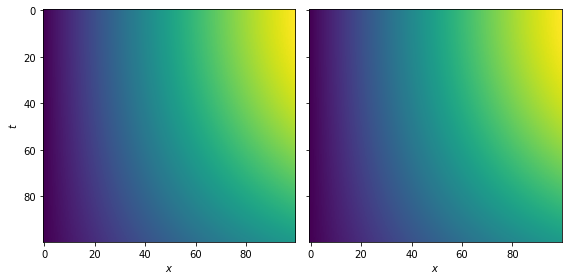

interactive(children=(FloatSlider(value=0.01, description='p', max=1.0, min=0.01, step=0.01), FloatSlider(valu…

<function __main__.plotfields(p, a)>

In [62]:
params = [0.01,0.01]


fig,ax = plt.subplots(1,2,facecolor='w', edgecolor='k',figsize=(4*2,4),sharey=True);
X,Y=np.meshgrid(np.linspace(0,100,100),np.linspace(0,100,100));
b1 = np.sin(params[0]*X)*np.cos(params[1]*Y);
b2 = np.sin(params[1]*X)*np.cos(params[0]*Y);
im1 = ax[0].imshow(b1,aspect='auto');
im2 = ax[1].imshow(b2,aspect='auto');
ax[0].set_ylabel(r'$t$');
ax[0].set_xlabel(r'$x$');
ax[1].set_xlabel(r'$x$');
plt.tight_layout();

def plotfields(p,a):
    params[0] = p; params[1] = a
    b1 = np.sin(params[0]*X)*np.cos(params[1]*Y)
    b2 = np.sin(params[1]*X)*np.cos(params[0]*Y)
    im1.set_data(b1)
    im2.set_data(b2)
    display(fig)

def on_button_clicked(b):
    fig.savefig("test_p{:.3s}_a{:.3s}.eps".format(str(int(100*params[0])),str(int(100*params[1]))))
    fig.savefig("test_p{:.3s}_a{:.3s}.png".format(str(int(100*params[0])),str(int(100*params[1]))))
button.on_click(on_button_clicked)

p_w  = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.01)
a_w  = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.01)
widgets.interact(plotfields,p=p_w,a=a_w)